In [26]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import pandas

df = pandas.read_csv( 'data_set.csv' ) 
df['zero'] = 0 
df.head( 5 ) 

,mutant,designed_res,sequence_pos,in_plos_paper,expression,tm_exists,tm,note,km,ekm,kcat,ekcat,ki,eki,kcatkm,ekcatkm,zero
0,S14A,A,14.0,1,1,1.0,40.017869,NaN,8.25,1.02,320.0,11.0,NaN,NaN,38823.0,4972.0,0
1,T15A,A,15.0,0,1,1.0,38.696923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,S16A,A,16.0,1,1,0.0,NaN,below detection,14.01,0.40,154.0,1.0,NaN,NaN,10997.0,331.0,0
3,S16N,N,16.0,0,0,0.0,NaN,below detection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,S17E,E,17.0,1,1,1.0,39.429892,NaN,7.32,0.38,641.0,9.0,NaN,NaN,87596.0,4719.0,0


<Container object of 113 artists>

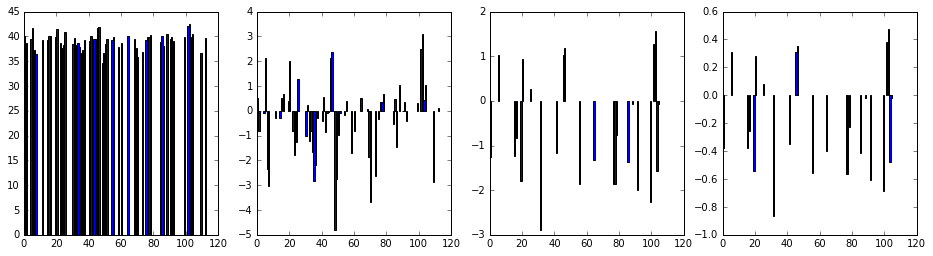

In [27]:
from numpy import log2, log10

plt.figure( figsize=( 16, 4 ) )
plt.subplot( 1, 4, 1 ) 
plt.bar( df.index, df.tm ) 
plt.subplot( 1, 4, 2 ) 
plt.bar( df.index, df.tm - 39.5 ) 
plt.subplot( 1, 4, 3 ) 
plt.bar( df.index, log2( df.tm - 39.6 ) )
plt.subplot( 1, 4, 4 ) 
plt.bar( df.index, log10( df.tm - 39.6 ) )

([<matplotlib.axis.XTick at 0x12215b450>,
 <a list of 113 Text xticklabel objects>)

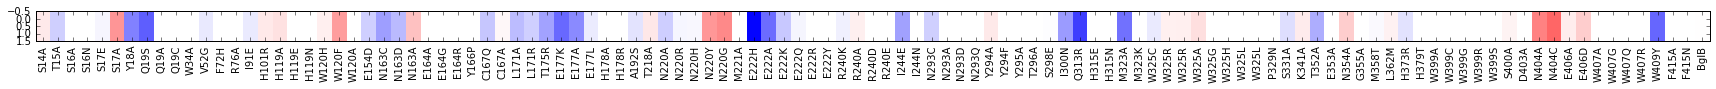

In [52]:
plt.figure( figsize=( 30, 10 ) )
df['my_tm'] = df.tm - 39.6 
plt.imshow( df[ [ 'my_tm', 'my_tm' ] ].T, interpolation='none', cmap='bwr', vmin=-5, vmax=5 ) 
plt.xticks( df.index, df.mutant, rotation=90 ) 

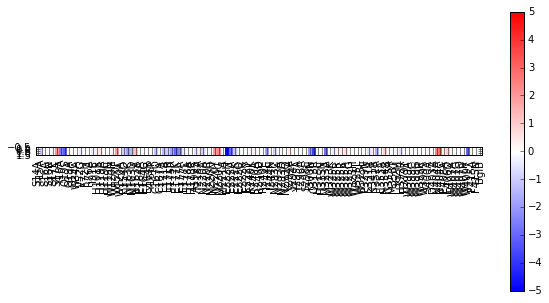

In [51]:
plt.figure( figsize=( 10, 5 ) )
df['my_tm'] = df.tm - 39.6 
plt.imshow( df[ [ 'my_tm', 'my_tm' ] ].T, interpolation='none', cmap='bwr', vmin=-5, vmax=5 ) 
plt.xticks( df.index, df.mutant, rotation=90 ) 
plt.colorbar()

([<matplotlib.axis.XTick at 0x1242fd550>,
 <a list of 113 Text xticklabel objects>)

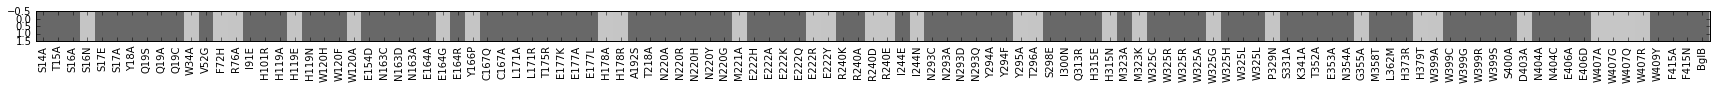

In [53]:
plt.figure( figsize=( 30, 10 ) )
plt.imshow( df[ [ 'expression', 'expression' ] ].T, interpolation='none', cmap='Greys', vmin=-1, vmax=2 ) 
plt.xticks( df.index, df.mutant, rotation=90 ) 